
The regular season for the 2023/24 National Basketball Association has concluded. Although the Los Angeles Lakers did not advance directly to the playoffs (they have to defeat two opponents in the play-in tournament), LeBron James has had another outstanding (his 21st in the league!) season. Once again, he proved to be the standout player on his team, ranking among the league's top scorers and assist leaders. Additionally, he achieved the best three-point shooting percentage of his entire career.

The closure of the regular season is also an opportune moment to compare and summarize the forecasts of LeBron's statistics per 36 minutes. I have created my own forecasts in the linked notebook: https://github.com/jakubtwalczak/LeBron_stats_2023_24_forecast/blob/main/lbj_stats_24_forecast.ipynb, which can be contrasted with those made by Basketball Reference before the season commenced.



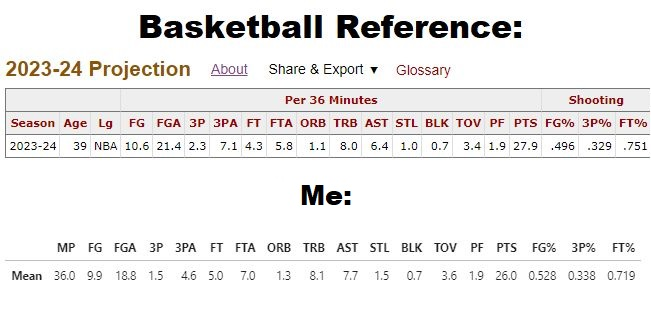

In [ ]:
from sklearn.metrics import *
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

The first step is to create the variables - lists of predictions and actual statistics per 36 minutes.

In [ ]:
br_model_per_36 = [10.6, 21.4, 2.3, 7.1, 4.3, 5.8, 1.1, 8.0, 6.4, 1, 0.7, 3.4, 1.9, 27.9, 0.496, 0.329, 0.751]
my_model_per_36 = [9.9, 18.8, 1.5, 4.6, 5, 7, 1.3, 8.1, 7.7, 1.5, 0.7, 3.6, 1.9, 26, 0.528, 0.338, 0.719]

real_per_36 = [9.8, 18.2, 2.1, 5.2, 4.4, 5.8, 0.9, 7.4, 8.5, 1.3, 0.5, 3.5, 1.1, 26.2, 0.54, 0.41, 0.75]

Now I'm defining a function to compare metrics. It will indicate which model performed better according to each metric. For the purpose of this function, I assume that only the R2 score (the coefficient of determination) is better when smaller.

In [ ]:
def compare_metrics(y_pred_1, y_pred_2, y_true, metric, metric_name=None, y_pred_1_name=None, y_pred_2_name=None):
  y1_met = metric(y_pred_1, y_true)
  y2_met = metric(y_pred_2, y_true)
  print(f"{y_pred_1_name} {metric_name}: {y1_met}")
  print(f"{y_pred_2_name} {metric_name}: {y2_met}")
  if metric != r2_score:
    if y1_met > y2_met:
      print(f"{y_pred_2_name} has better {metric_name}.")
    elif y1_met < y2_met:
      print(f"{y_pred_1_name} has better {metric_name}.")
    else:
      print(f"Models' {metric_name}'s are equal.")
  else:
    if y1_met > y2_met:
      print(f"{y_pred_1_name} has better {metric_name}.")
    elif y1_met < y2_met:
      print(f"{y_pred_2_name} has better {metric_name}.")
    else:
      print(f"Models' {metric_name}'s are equal.")

I'm going to compare the models using the most popular metrics: Mean Squared Error, Mean Absolute Error, R2 score and Mean Absolute Percentage Error.

In [ ]:
metrics = {
    "MSE": mean_squared_error,
    "MAE": mean_absolute_error,
    "R2": r2_score,
    "MAPE": mean_absolute_percentage_error
}

metrics.items()

dict_items([('MSE', <function mean_squared_error at 0x785ca368eef0>), ('MAE', <function mean_absolute_error at 0x785ca368ed40>), ('R2', <function r2_score at 0x785ca368f1c0>), ('MAPE', <function mean_absolute_percentage_error at 0x785ca368ee60>)])

The model created by myself outperformed the other model according to every metric used. MAPE and R2 provide a better overall assessment of the models, as they illustrate the real aggregated ratio of error. On the other hand, the results of MAE and MSE calculations show which model coped better with predicting higher values. My model demonstrated much higher efficiency in that area, nearly perfectly predicting points per game and field goals made per game.

In [ ]:
for name, metric in metrics.items():
  compare_metrics(br_model_per_36, my_model_per_36, real_per_36, metric, metric_name=name,
                  y_pred_1_name="Basketball Reference prediction model", y_pred_2_name="My prediction model")
  print("_________________________________________________")

Basketball Reference prediction model MSE: 1.354617529411764
My prediction model MSE: 0.2915464117647059
My prediction model has better MSE.
_________________________________________________
Basketball Reference prediction model MAE: 0.7250588235294115
My prediction model MAE: 0.42441176470588227
My prediction model has better MAE.
_________________________________________________
Basketball Reference prediction model R2: 0.9757714142713187
My prediction model R2: 0.9937498235944361
My prediction model has better R2.
_________________________________________________
Basketball Reference prediction model MAPE: 0.15418341085839712
My prediction model MAPE: 0.1480187188730487
My prediction model has better MAPE.
_________________________________________________


I've created arrays with normalized residuals for each model. Now, each difference needs to be plotted.

In [ ]:
br_diff_norm = (np.array(br_model_per_36) - np.array(real_per_36)) / np.array(real_per_36)
my_diff_norm = (np.array(my_model_per_36) - np.array(real_per_36)) / np.array(real_per_36)
data = np.array([br_diff_norm, my_diff_norm])

I've created a labels by concatenating the statistic category with value per 36 minutes.

In [ ]:
labels = ['FGM', 'FGA', '3PM', '3PA', 'FTM', 'FTA', 'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '3P%', 'FT%']
labels_with_values = [f"{label}\n({value})" for label, value in zip(labels, real_per_36)]

The plot displays normalized residuals. As observed, my model more efficiently predicts higher values (except for total rebounds per game). However, the differences may appear significant.

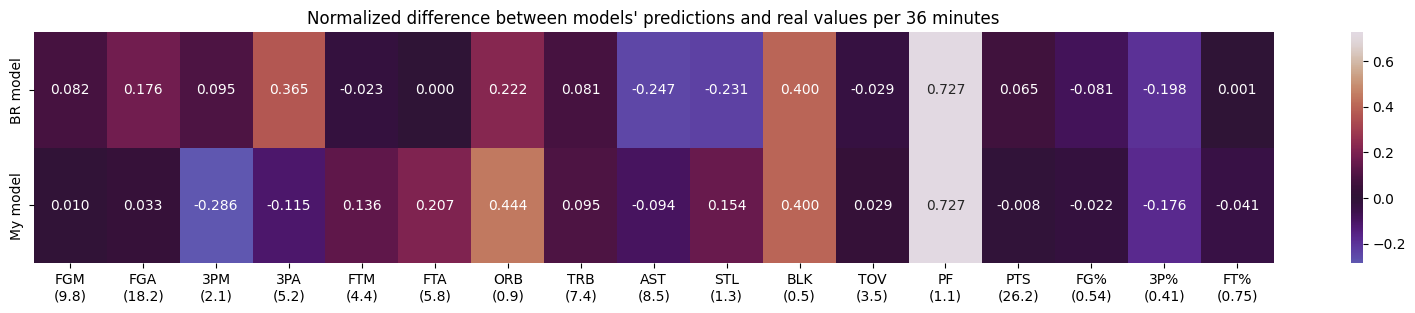

In [ ]:
plt.figure(figsize=(20, 3))
ax = sns.heatmap(data, annot=True, fmt=".3f", xticklabels=labels_with_values, yticklabels=['BR model', 'My model'], cmap='twilight', center=0)

plt.title("Normalized difference between models' predictions and real values per 36 minutes")
plt.xticks(rotation=0, ha='center')
plt.show()

Due to the fact that errors in the prediction of personal fouls and blocks are the same for each model and are significantly high, I will remove them from further visualization and analysis.

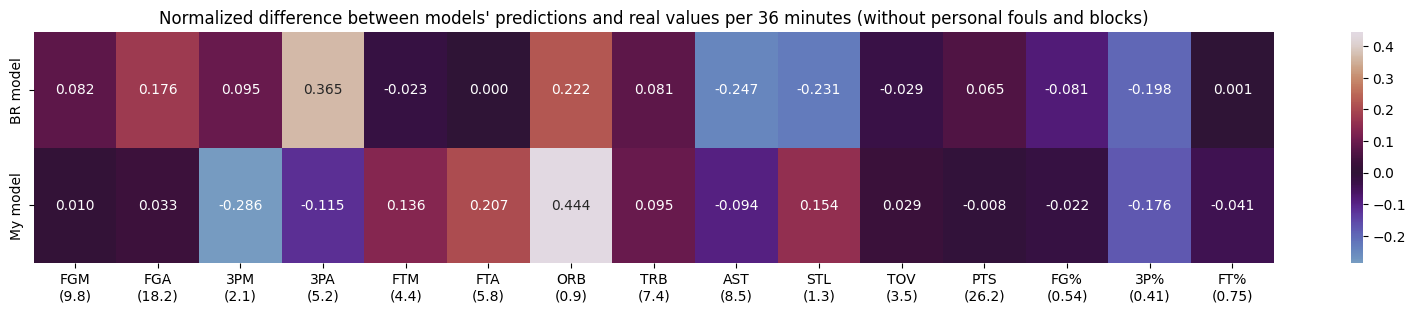

In [ ]:
real_per_36 = np.delete(real_per_36, [-5, -7]).tolist()
data_without_pf_blk = np.delete(data, (-7, -5), axis=1)

labels = ['FGM', 'FGA', '3PM', '3PA', 'FTM', 'FTA', 'ORB', 'TRB', 'AST', 'STL', 'TOV', 'PTS', 'FG%', '3P%', 'FT%']
labels_with_values = [f"{label}\n({value})" for label, value in zip(labels, real_per_36)]

plt.figure(figsize=(20, 3))
ax = sns.heatmap(data_without_pf_blk, annot=True, fmt=".3f", xticklabels=labels_with_values, yticklabels=['BR model', 'My model'], cmap='twilight', center=0)

plt.title("Normalized difference between models' predictions and real values per 36 minutes (without personal fouls and blocks)")
plt.xticks(rotation=0, ha='center')
plt.show()

The last steps of this comparison involve calculating the cumulative and average errors of residuals. Without assigning weights to errors, the differences between the aggregated residuals are not notable.

In [ ]:
data_without_pf_blk = np.abs(data_without_pf_blk)

print(f"Cumulated Basketball Reference model absolute normalized error: {np.round(np.sum(data_without_pf_blk[0, :]), 3)}")
print(f"Cumulated my model absolute normalized error: {np.round(np.sum(data_without_pf_blk[1, :]), 3)}")
print(f"Average Basketball Reference model normalized error: {np.round(np.mean(data_without_pf_blk[0, :]), 3)}")
print(f"Average my model normalized error: {np.round(np.mean(data_without_pf_blk[1, :]), 3)}")

Cumulated Basketball Reference model absolute normalized error: 1.896
Cumulated my model absolute normalized error: 1.85
Average Basketball Reference model normalized error: 0.126
Average my model normalized error: 0.123


As mentioned earlier, my model predicted higher values better. To illustrate the real margin between both models, I can assign weights by multiplying array elements. It appears that my model indeed has more accurate predictions, as indicated by the mean errors calculated earlier.

In [ ]:
weighted_residuals = data_without_pf_blk * np.array(real_per_36)

print(f"Cumulated Basketball Reference model absolute normalized weighted error: {np.round(np.sum(weighted_residuals[0, :]), 3)}")
print(f"Cumulated my model absolute normalized weighted error: {np.round(np.sum(weighted_residuals[1, :]), 3)}")
print(f"Average Basketball Reference model normalized weighted error: {np.round(np.mean(weighted_residuals[0, :]), 3)}")
print(f"Average my model normalized weighted error: {np.round(np.mean(weighted_residuals[1, :]), 3)}")

Cumulated Basketball Reference model absolute normalized weighted error: 11.326
Cumulated my model absolute normalized weighted error: 6.215
Average Basketball Reference model normalized weighted error: 0.755
Average my model normalized weighted error: 0.414


It seems that the model I created has slightly better predictions than Basketball Reference's in LeBron's case. but it's difficult to say it with certainty without a thorough analysis. Regardless, I might be satisfied with the results of my work and the outcome of the comparison.

Thank you for your attention!